In [1]:
import numpy as np
from sklearn.datasets import make_regression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X, y = make_regression(n_samples=50, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13 )

In [3]:
# X = X.reshape(10)
# X = X.reshape(-1,1)
# X = X.ravel()

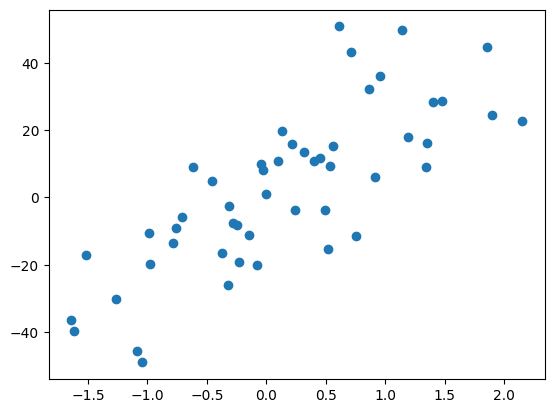

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

reg.fit(X,y)

LinearRegression()

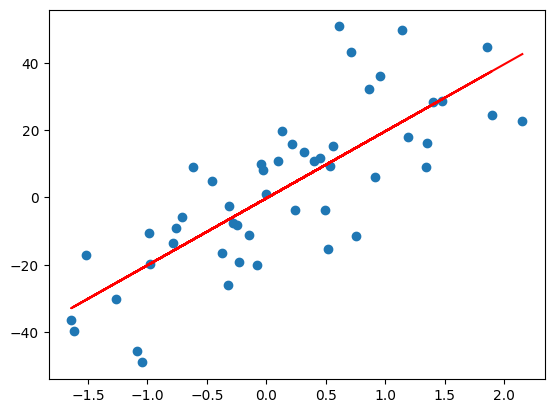

In [6]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [7]:
reg.intercept_ # b

-0.21642335915031374

In [8]:
reg.coef_ # m

array([19.89887551])

#### From the OLS method, we know that value of b should be -5.73, we will take random value of b and apply gradient descent and try to come closer to the values

77.73405129218438 -0.21642335915031374


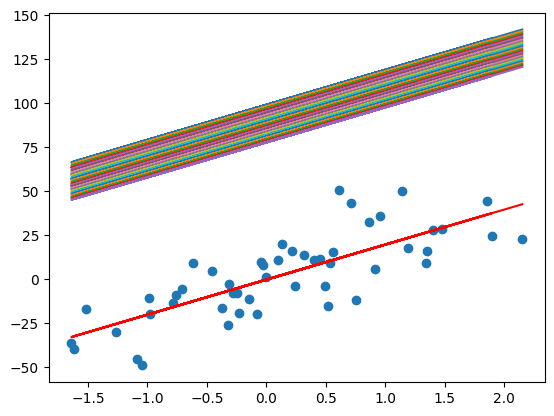

In [9]:
b_ = 100
m = reg.coef_[0]
lr = 0.0001
epochs = 25

for i in range(epochs):
    loss_slope = -2* np.sum(y - m*X.ravel() - b_)
    b_ = b_ - (lr* loss_slope)

    y_pred = m*X + b_

    plt.plot(X, y_pred)

plt.scatter(X,y)
plt.plot(X, reg.predict(X),color='red')
print(b_, reg.intercept_)

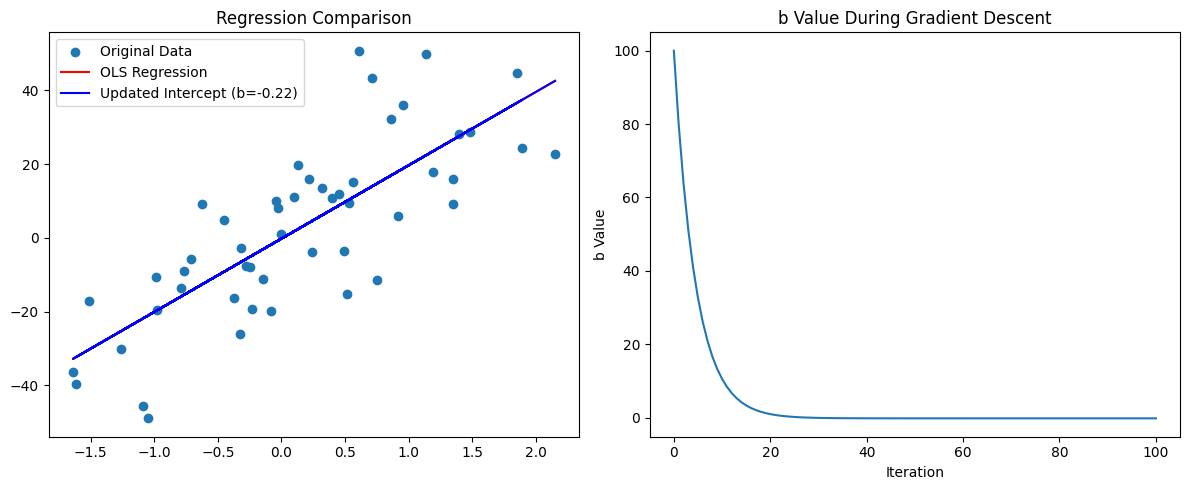

b =  -0.21642333873586747
target (original intercept) =  -0.21642335915031374


In [10]:
# code generated by claude.ai for gradient descent

# Assuming X and y are already defined
# Fit initial regression to get m (slope)
m = reg.coef_[0]
b = 100  # random initial value
learning_rate = 0.1

# Track b values for analysis
b_history = [b]

# Gradient descent
for _ in range(100):
    # Calculate residuals
    residuals = y - (m * X.ravel() + b)
    
    # Gradient with respect to b is the mean of residuals
    loss_slope = -2 * np.mean(residuals)
    
    # Update b
    step_size = loss_slope * learning_rate
    b = b - step_size
    b_history.append(b)

# Visualization
plt.figure(figsize=(12,5))

# Scatter plot with regression lines
plt.subplot(121)
plt.scatter(X, y, label='Original Data')
plt.plot(X, reg.predict(X), color='red', label='OLS Regression')
plt.plot(X, m * X + b, color='blue', label=f'Updated Intercept (b={b:.2f})')
plt.title('Regression Comparison')
plt.legend()

# Plot of b values during descent
plt.subplot(122)
plt.plot(b_history)
plt.title('b Value During Gradient Descent')
plt.xlabel('Iteration')
plt.ylabel('b Value')

plt.tight_layout()
plt.show()

print('b = ', b)
print('target (original intercept) = ', reg.intercept_)

In [11]:
X,y = make_regression(n_samples=1000, n_features=1, n_informative=1, n_targets=1, noise=20)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

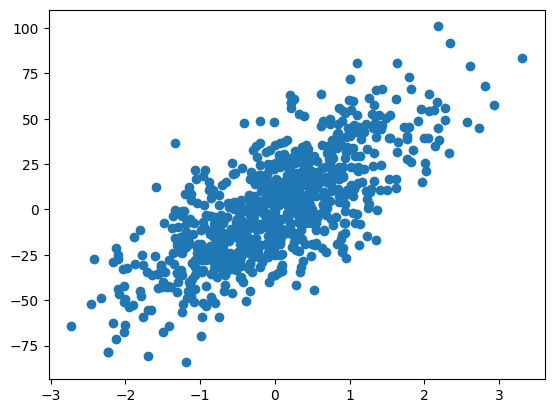

In [30]:
plt.scatter(X_train,y_train)

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.coef_)
print(lr.intercept_)

[22.45494381]
0.9533660418536338


In [32]:
class GBRegressor:

    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs

    
    def fit(self,X, y):
        # calculate b using gradient regression
        for i in range(self.epochs):
            loss_slope_b = -2 * np.mean(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.mean((y - self.m*X.ravel() - self.b)*X.ravel())
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr*loss_slope_m)

        return (self.m, self.b)
    
    def predict(self,X):
        return self.m*X + self.b

In [36]:
gb = GBRegressor(0.1, 60)

gb.fit(X_train,y_train)

(22.455327420049553, 0.9532196917334408)

In [34]:
print(lr.coef_[0],lr.intercept_)

22.45494381429162 0.9533660418536338


In [39]:
from sklearn.metrics import r2_score
y_pred = gb.predict(X_test)
r2_score(y_test, y_pred)

0.42898439058204774

In [40]:
y_pred_lr = lr.predict(X_test)
r2_score(y_test, y_pred_lr)

0.4289877149037111